In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from wordcloud import WordCloud
import seaborn as sns
import datetime
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import folium

In [ ]:
!pip install folium

     ---------------------------------------- 96.5/96.5 kB 2.8 MB/s eta 0:00:00
  Using cached branca-0.5.0-py3-none-any.whl (24 kB)


In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   1295 non-null   object
 1   Goals    1295 non-null   int64 
 2   Years    1295 non-null   object
 3   Country  1295 non-null   object
dtypes: int64(1), object(3)
memory usage: 40.6+ KB


In [ ]:
df.head()

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil


In [ ]:
df.groupby(['Country']).sum().sort_values('Goals', ascending=False).head(5)

,Goals
Country,
Brazil,228
Germany,226
Argentina,135
Italy,123
France,115


In [ ]:
df.groupby(['Country']).size().sort_values(ascending=False)

Country
Brazil       81
Germany      78
Italy        60
Argentina    59
France       58
             ..
Haiti         1
Angola        1
Bolivia       1
Israel        1
Iraq          1
Length: 76, dtype: int64

In [ ]:
df['year_list']=df.Years.str.split("-")
df.head()

,Player,Goals,Years,Country,year_list
0,Miroslav Klose,16,2002-2006-2010-2014,Germany,"[2002, 2006, 2010, 2014]"
1,Ronaldo,15,1998-2002-2006,Brazil,"[1998, 2002, 2006]"
2,Gerd Muller,14,1970-1974,Germany,"[1970, 1974]"
3,Just Fontaine,13,1958,France,[1958]
4,Pele,12,1958-1962-1966-1970,Brazil,"[1958, 1962, 1966, 1970]"


In [ ]:
def checkFour(x):
    for  value in x:
        if len(str(value)) !=4:
            return False
        return True


df['check']= df['year_list'].apply(checkFour)
print(len(df[df['check']== False]))

45


In [ ]:

df['LenCup']= df['year_list'].str.len()
df.head(10)


,Player,Goals,Years,Country,year_list,check,LenCup
0,Miroslav Klose,16,2002-2006-2010-2014,Germany,"[2002, 2006, 2010, 2014]",True,4
1,Ronaldo,15,1998-2002-2006,Brazil,"[1998, 2002, 2006]",True,3
2,Gerd Muller,14,1970-1974,Germany,"[1970, 1974]",True,2
3,Just Fontaine,13,1958,France,[1958],True,1
4,Pele,12,1958-1962-1966-1970,Brazil,"[1958, 1962, 1966, 1970]",True,4
5,Jurgen Klinsmann,11,1990-1994-1998,Germany,"[1990, 1994, 1998]",True,3
6,Sandor Kocsis,11,1954,Hungary,[1954],True,1
7,Gabriel Batistuta,10,1994-1998-2002,Argentina,"[1994, 1998, 2002]",True,3
8,Gary Lineker,10,1986-1990,England,"[1986, 1990]",True,2
9,Thomas Muller,10,2010-2014,Germany,"[2010, 2014]",True,2


In [ ]:
#df[df['LenCup']==4].info()
#월드컵 4회 출전 선수가 모두 몇명인지알려줘
df['LenCup'].value_counts()[4]

16

In [ ]:
2002년에 출전한 선수 모두 출력
df[df.Years.str.contains('2002')]


,Player,Goals,Years,Country,year_list,check,LenCup
0,Miroslav Klose,16,2002-2006-2010-2014,Germany,"[2002, 2006, 2010, 2014]",True,4
1,Ronaldo,15,1998-2002-2006,Brazil,"[1998, 2002, 2006]",True,3
7,Gabriel Batistuta,10,1994-1998-2002,Argentina,"[1994, 1998, 2002]",True,3
20,Christian Vieri,9,1998-2002,Italy,"[1998, 2002]",True,2
26,Rivaldo,8,1998-2002,Brazil,"[1998, 2002]",True,2
...,...,...,...,...,...,...,...
1231,Alvaro Recoba,1,2002,Uruguay,[2002],True,1
1233,Dario Rodriguez,1,2002,Uruguay,[2002],True,1
1244,Clint Mathis,1,2002,USA,[2002],True,1
1246,John O Brien,1,2002-2006,USA,"[2002, 2006]",True,2


In [ ]:
이름이 carlos인 데이터 출력

In [ ]:
df[df.Player.str.lower().str.contains('carlos')]

,Player,Goals,Years,Country,year_list,check,LenCup
150,Carlos Borges,4,1954,Uruguay,[1954],True,1
163,Carlos Peucelle,3,1930,Argentina,[1930],True,1
165,Carlos Tevez,3,2006-2010,Argentina,"[2006, 2010]",True,2
338,Carlos Tenorio,2,2002-2006,Ecuador,"[2002, 2006]",True,2
511,Carlos Babington,1,1974,Argentina,[1974],True,1
584,Carlos Alberto,1,1970,Brazil,[1970],True,1
589,Roberto Carlos,1,1998-2002-2006,Brazil,"[1998, 2002, 2006]",True,3
643,Carlos Vidal,1,1930,Chile,[1930],True,1
655,Carlos Valderrama,1,1990-1994-1998,Colombia,"[1990, 1994, 1998]",True,3
684,Carlos Oliveira,1,1938,Cuba,[1938],True,1


In [ ]:
월드컵 출전이 1회이지만 골을 가장 많이 넣은 선수

In [ ]:
df[df['LenCup']==1].sort_values('Goals',ascending=False).Player.values[:5]

array(['Just Fontaine', 'Sandor Kocsis', 'Ademir', 'Eusebio',
       'Guillermo Stabile'], dtype=object)

In [ ]:
월드컵 출전이 1회인 선수가 가장 많은 나라는 어디입니까

In [ ]:
df[df['LenCup']==1].Country.value_counts().index[0]

'Brazil'

In [ ]:
한글 자연어 처리 라이브러리 (konlpy) 형태소 분석기(Hannanum, kkma, koran, mecab, okt)


In [ ]:
okt=Okt()
okt.morphs('월드컵 출전횟수가 1회뿐인 선수들이 가장 많은 나라는 어디인가?')


['월드컵',
 '출전',
 '횟수',
 '가',
 '1회',
 '뿐인',
 '선수',
 '들',
 '이',
 '가장',
 '많은',
 '나라',
 '는',
 '어디',
 '인가',
 '?']

In [ ]:
okt.nouns("월드컵 출전횟수가 1회 뿐인 선수들이 가장 많은 국가는 어디인가?")

['월드컵', '출전', '횟수', '선수', '가장', '국가', '어디']

In [ ]:
대한민국 헌법

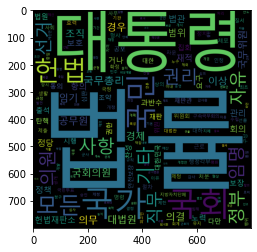

In [ ]:
with open('대한민국헌법.txt', 'r', encoding='utf8')as f:
    text = f.read()
okt =Okt()
nouns=okt.nouns(text)
words = [word for word in nouns if len(word)>1]
c= Counter(words)
wc= WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
wc.to_file('헌법_워드클라이드.png')

In [ ]:
blog_text = open('blog_text.txt', 'rt', encoding='utf-8').read()

okt = Okt()
line=[]
line= okt.pos(blog_text)  #단어와 품사


#명사와 형용사 추출
n_adj = []
for word, tag in line :
    if tag in ['Noun', 'Adjective']:
        n_adj.append(word)
print(n_adj)

['감격', '상암', '맛집', '리스트', '눈길', '상암', '맛집', '리스트', '흡족했던', '상암', '맛집', '리스트', '무한', '흡입', '가능한', '상암', '맛집', '행복', '가득한', '상암', '맛집', '모음', '집', '경이', '상암', '맛집', '모음', '쫄깃', '상암', '맛집', '감탄', '절로', '상암', '맛집', '훌륭했던', '상암', '맛집', '리스트', '코스', '요리', '만족', '상암', '파스타', '맛집', '인', '칸토', '키친', '상암', '맛집', '후', '토', '식당', '규', '카츠', '맛있는', '집', '디엠씨', '맛집', '상암', '참치', '방', '주차', '분위기', '좋은', '곳', '깔끔했던', '상암', '맛집', '상암', '상암', '맛집', '모', '유명한', '신선한', '김밥', '상암', '맛집', '월화', '고기', '돼지고기', '여기', '최고', '상암', '카페', '추천', '맛집', '런이트', '위치', '메뉴', '주차', '여전한', '상암', '맛집', '상암', '맛집', '카노', '상암', '맛집', '소담', '가성', '비', '굿', '소갈비', '함흥', '냉면', '맛깔', '스러웠던', '상암', '맛집', '상암', '베리', '코', '상암', '맛집', '베리', '코', '시간', '돼지', '상암', '맛집', '고', '일본', '스테이크', '밥', '상암', '맛집', '건강한', '로봇', '김밥', '그린', '삼겹살', '목', '살이', '땐', '상암', '맛집', '월화', '고기', '상암', '맛집', '소담', '냉면', '갈비', '존맛', '디지털미디어시티역', '밥집', '돈', '산', '상암', '맛집', '고', '상암', '맛집', '자꾸', '상암', '맛집', '청진', '생', '대구', '탕', '상암', '맛집', '나', '알', '마카

In [ ]:
stop_words= '아니었네요. 있어서 끝'
stop_words =set(stop_words.split(' '))
n_adj= [word for word in n_adj if not word in stop_words]
print(len(n_adj))

34958


Counter({'상암': 900, '맛집': 661, '고기': 305, '메뉴': 228, '마포구': 200, '주문': 181, '있는': 150, '서울특별시': 145, '시간': 131, '김밥': 126, '진짜': 116, '참치': 110, '좋은': 110, '상암동': 108, '선택': 105, '소고기': 104, '정도': 103, '하나': 101, '입니다': 100, '샐러드': 99, '소스': 99, '정말': 93, '생각': 92, '추천': 91, '여기': 89, '점심': 87, '식사': 87, '음식': 85, '월드컵': 80, '갈비': 78, '가격': 78, '양념': 76, '북로': 75, '방문': 74, '냉면': 71, '느낌': 70, '바로': 67, '재료': 67, '돈까스': 64, '테이블': 64, '예약': 64, '아주': 64, '튀김': 63, '서울': 63, '주차': 61, '매장': 61, '자동': 61, '우리': 61, '재생': 60, '화질': 60, '옵션': 60, '먹기': 60, '새우': 60, '코스': 59, '삼겹살': 59, '오소': 58, '다른': 57, '사진': 57, '요리': 56, '위치': 56, '자리': 56, '다음': 56, '저희': 56, '김치': 55, '맛있게': 55, '맛있는': 54, '같은': 54, '처음': 53, '국물': 53, '사람': 53, '로봇': 52, '영업': 51, '대구': 50, '역시': 50, '주소': 50, '살짝': 50, '매일': 49, '추가': 48, '기본': 48, '식당': 47, '지하': 47, '오늘': 47, '가게': 46, '때문': 46, '치즈': 46, '그냥': 46, '카페': 45, '곱창': 45, '조금': 45, '같아요': 45, '다양한': 44, '가성': 43, '한번': 43, '반찬': 43, '접기': 43, '친구': 

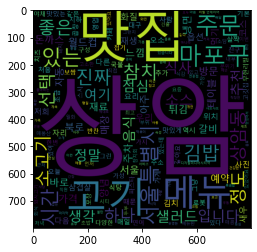

In [ ]:
words = [ word for word in n_adj if len(word) >1 ]

c = Counter(words)  #단어별  빈도수 처리, 딕셔너리타입으로 반환
print(c)

image_file = 'alice_mask.png'
img_file = Image.open(image_file) #이미지 파일을 읽어서 파이썬 실행환경 메모리에 이미지 객체로 생성
alice_mask = np.array(img_file) #파일 객체를 ndarray 객체로 생성 (수치 배열)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
wc.to_file('헌법_워드클라이드.png')

In [ ]:
이미지 모양대로 단어 빈도수 출력

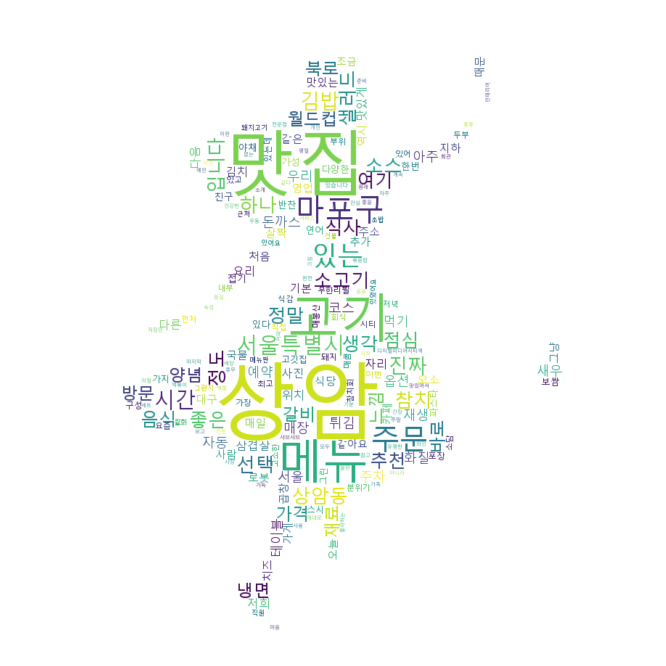

In [ ]:
words = [ word for word in n_adj if len(word) >1 ]

c = Counter(words)  #단어별  빈도수 처리, 딕셔너리타입으로 반환


image_file = 'alice_mask.png'
img_file = Image.open(image_file) #이미지 파일을 읽어서 파이썬 실행환경 메모리에 이미지 객체로 생성
alice_mask = np.array(img_file) #파일 객체를 ndarray 객체로 생성 (수치 배열)

wc = WordCloud(font_path='malgun', background_color='white', mask=alice_mask )
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(12, 12))
plt.imshow(gen, interpolation='bilinear')
plt.axis('off')
plt.savefig('헌법_alice.png')

In [ ]:
지도시각화 유형

In [ ]:
Dot Dentity map 지도위에 데이터 분포 표현ㄴ

Dot Dentity Map  - 지도 위에 데이터 분포를 표현
Choropleth Map(Field Map) - 지리적 영역 범위별 수치 데이터 값을 색으로 표현
Symbol Map(Bubble Map) - 지도의 특정 지점에 해당하는 수치 값을 symbol의 크기로 표현
Connection Map (Flow Map) - 지역 간 이동 경로를 표현하는 시각화 유형
구글에 검색하면 이미지로 한번에 볼수 있다

어떤 지도를 활용함에따라 시각적 분석효과를 극대화 할수 있다
ec>구글  공기질 시각호 , 서울 건물 승인 허가 연도 데이터 시각화

여러 시점별로 데이터 변화를 한눈에 확인할수 있도록 나눠서 ,,,

Folium 라이브러리
카카오 개발자 open api 지도

In [ ]:
m= folium.Map(location= [36.5, 128.8],zoom_start=115)
m


In [ ]:
행정구역  단위의 고령인구 데이터

In [ ]:
df =pd.read_csv("older_population.csv")
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구       424 non-null    object
 1   동       424 non-null    object
 2   인구      424 non-null    int64 
 3   남자      424 non-null    int64 
 4   여자      424 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 16.7+ KB
None
     구    동     인구    남자     여자
0  종로구  사직동   9700  4375   5325
1  종로구  삼청동   3013  1443   1570
2  종로구  부암동  10525  5002   5523
3  종로구  평창동  18830  8817  10013
4  종로구  무악동   8745  4078   4667


In [ ]:
df.head()

,구,동,인구,남자,여자
0,종로구,사직동,9700,4375,5325
1,종로구,삼청동,3013,1443,1570
2,종로구,부암동,10525,5002,5523
3,종로구,평창동,18830,8817,10013
4,종로구,무악동,8745,4078,4667


In [ ]:
행정구역 단위 좌표 데이터

In [ ]:
geo_data='TL_SCCO_CTPRVN.json'
geo_data

'TL_SCCO_CTPRVN.json'

In [ ]:
import json

In [ ]:
with open('TL_SCCO_CTPRVN.json', 'rt', encoding='cp949') as file:
    realData = json.load(file)

center=[37.541, 126.986]
m= folium.Map(location=center, zoom_start=10)

folium.Choropleth(geo_data =geo_data,
                 data=df,
                 columns= ('동','인구'),
                 key_on= 'feature.properties.동',
                 fill_color= 'BuPu',
                 legend_name= '노령 인구수').add_to(m)
m

UnicodeDecodeError: 'cp949' codec can't decode byte 0xeb in position 44531: illegal multibyte sequence

In [ ]:
df_gu = df.groupby(['구'])['인구'].sum().to_frame().reset_index()
print(df_gu.head())

center=[37.541, 126.986]
m= folium.Map(location=center, zoom_start=10)
folium.Choropleth(geo_data =geo_data,
                 data=df_gu,
                 columns= ('구','인구'),
                 key_on= 'feature.properties.구',
                 fill_color= 'RdPu',
                 legend_name= '노령 인구수').add_to(m)
m

     구      인구
0  강남구  549043
1  강동구  430522
2  강북구  317875
3  강서구  600240
4  관악구  519953


FileNotFoundError: [Errno 2] No such file or directory: 'TL_SCCO_CTPRVN.json'

In [ ]:

df_gu = df.groupby(['구'])['인구'].sum().to_frame().reset_index()
print(df_gu.head())

center = [37.541,126.986]  # 서울 중심 좌표
m = folium.Map(location=center, zoom_start=10)

folium.Choropleth(geo_data = geo_data,
                  data=df_gu,
                  columns = ('구', '인구'),
                  key_on = 'feature.properties.구',
                  fill_color='PuBuGn',
                  legend_name='노령 인구수').add_to(m)
m

KeyError: '구'

In [ ]:
df =pd.read_csv("toilet_seoul.csv")

In [ ]:
df =pd.read_csv("toilet_seoul.csv")


center = [37.541,126.986]  # 서울 중심 좌표

m = folium.Map(location=center, zoom_start=10)

folium.Choropleth(geo_data = geo_data,
                  data=df,
                  columns = ('구', '인구'),
                  key_on = 'feature.properties.동',
                  fill_color='PuBuGn',
                  legend_name='노령 인구수').add_to(m)
m

In [ ]:
df = pd.read_csv('toilet_seoul.csv')

In [ ]:
folium.Circle(location, radius, popup=None, tooltip=None, **kwargs)
    location: tuple[float, float]
        Latitude and Longitude pair (Northing, Easting)
    popup: string or folium.Popup, default None
        Input text or visualization for object displayed when clicking.
    tooltip: str or folium.Tooltip, default None
        Display a text when hovering over the object.
    radius: float
        Radius of the circle, in meters.
    **kwargs
        Other valid (possibly inherited) options.

IndentationError: unexpected indent (1676513832.py, line 2)

In [ ]:
df

,고유번호,위도,경도
0,92,37.501401,127.158647
1,93,37.644937,127.073728
2,94,37.640335,127.077637
3,96,37.645724,127.020449
4,98,37.659783,127.031187
...,...,...,...
5041,1332,37.531873,126.854461
5042,1340,37.553483,126.843646
5043,1348,37.558864,126.848219
5044,1341,37.548020,126.860020


In [ ]:
df = pd.read_csv('toilet_seoul.csv')
df = df[['고유번호', '위도', '경도']]



center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=10)

# 1000 개의 데이터만 그려냅니다.
for i in df.index[:1000]:
    folium.Circle(
        location = df.loc[i, ['위도', '경도']].values.tolist(),
        tooltip = df.loc[i, '고유번호'],
        radius = 100
    ).add_to(m)
m

In [ ]:
center = [37.541,126.986]  # 서울 중심 좌표
m = folium.Map(location=center, zoom_start=10)
folium.Circle(location=df.loc[0, ['위도', '경도']].values.tolist(),
              tooltip=df.loc[0, '고유번호'],
              radius=300).add_to(m)
m

# 공공데이터포털(data.go.kr)에서 소상공인시장진흥공단_상사(상권)정보


## 스타벅스

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

In [ ]:
#하나 이상의 csv파일을 로드해서 하나의 dataframe객체로 병합
from glob import glob

file_names= glob('소상공인시장진흥공단_상가(상권)정보_20220630/*.csv')
print(file_names)


['소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_강원_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_경기_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_경남_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_경북_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_광주_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_대구_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_대전_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_부산_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_서울_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_세종_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_울산_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_인천_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_전남_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_전북_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_제주_202206.

In [ ]:
import pandas as pd
total = pd.DataFrame()
for file_name  in file_names:
    temp = pd.read_csv(file_name, encoding='utf-8')
    total = pd.concat([total, temp])

total.reset_index(inplace=True, drop=True)
print(total.shape)
print(total.info())
print(total.head())


C:\Users\82105\AppData\Local\Temp\ipykernel_26844\618567135.py:4: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, encoding='utf-8')
C:\Users\82105\AppData\Local\Temp\ipykernel_26844\618567135.py:4: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, encoding='utf-8')
C:\Users\82105\AppData\Local\Temp\ipykernel_26844\618567135.py:4: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, encoding='utf-8')
C:\Users\82105\AppData\Local\Temp\ipykernel_26844\618567135.py:4: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, encoding='utf-8')
C:\Users\82105\AppData\Local\Temp\ipykernel_26844\618567135.py:4: DtypeWarning: Columns (35) have mixed types. Specify dtype option 

(2363994, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363994 entries, 0 to 2363993
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      int64  
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보 

In [ ]:
#분석에 필요한 컬럼 추출
data_columns = ['상가업소번호', '상호명','지점명', '상권업종대분류명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '경도', '위도']
data = total[data_columns]
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363994 entries, 0 to 2363993
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   상가업소번호    int64  
 1   상호명       object 
 2   지점명       object 
 3   상권업종대분류명  object 
 4   상권업종중분류명  object 
 5   시도명       object 
 6   시군구명      object 
 7   행정동명      object 
 8   경도        float64
 9   위도        float64
dtypes: float64(2), int64(1), object(7)
memory usage: 180.4+ MB
None
     상가업소번호            상호명  지점명 상권업종대분류명   상권업종중분류명  시도명 시군구명  행정동명  \
0  25033300      동그라미중고타이어  NaN       소매  자동차/자동차용품  강원도  강릉시  포남1동   
1  17174549  세인트존스호텔Ohcrab  NaN       숙박      호텔/콘도  강원도  강릉시   초당동   
2  17174079        평창라마다호텔  NaN       숙박      호텔/콘도  강원도  평창군  대관령면   
3  17173904    호텔탑스텐스카이라운지  NaN       숙박      호텔/콘도  강원도  강릉시   옥계면   
4  24412526          레이디가구  NaN       소매       가구소매  강원도  원주시   무실동   

           경도         위도  
0  128.904472  37.770252  
1  128.920908  37.791299  
2  128.717971  37.660051  
3  129.

In [ ]:
data.head()

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,25033300,동그라미중고타이어,NaN,소매,자동차/자동차용품,강원도,강릉시,포남1동,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,숙박,호텔/콘도,강원도,강릉시,초당동,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,숙박,호텔/콘도,강원도,평창군,대관령면,128.717971,37.660051
3,17173904,호텔탑스텐스카이라운지,NaN,숙박,호텔/콘도,강원도,강릉시,옥계면,129.052902,37.654680
4,24412526,레이디가구,NaN,소매,가구소매,강원도,원주시,무실동,127.917307,37.327668


In [ ]:
data['상권업종대분류명'].unique()

array(['소매', '숙박', '학문/교육', '음식', '생활서비스', '부동산', '관광/여가/오락', '스포츠'],
      dtype=object)

In [ ]:
전국 카페 갯수
data.loc[data['상권업종중분류명']=='커피점/카페']

SyntaxError: invalid syntax (2558135164.py, line 1)

In [ ]:
#전국 카페 개수
df_coffe = data.loc[data['상권업종중분류명']=='커피점/카페']
len(df_coffe)
#전국 스타벅스 데이터
df_coffe.loc[df_coffe["상호명"].str.contains("스타벅스")].reset_index()

110455

In [ ]:
data.시도명.unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [ ]:
#서울에 있는 카페 변수 저장
soul_coffe=data.loc[(data['시도명']=='서울특별시')&(data['상권업종중분류명']=='커피점/카페')]
len(soul_coffe)

20092

In [ ]:
서울 스타벅스 갯수
soul_coffe=soul_coffe[soul_coffe["상호명"].str.contains("스타벅스")].reset_index()
467

In [ ]:
soul_coffe['시군구명'].value_counts()

강남구     76
중구      42
서초구     38
송파구     33
종로구     28
영등포구    28
마포구     27
용산구     18
광진구     16
서대문구    16
강서구     16
성북구     15
강동구     13
양천구     13
관악구     11
동작구     11
노원구     11
금천구     11
구로구     10
동대문구     9
은평구      7
중랑구      6
성동구      5
강북구      5
도봉구      2
Name: 시군구명, dtype: int64

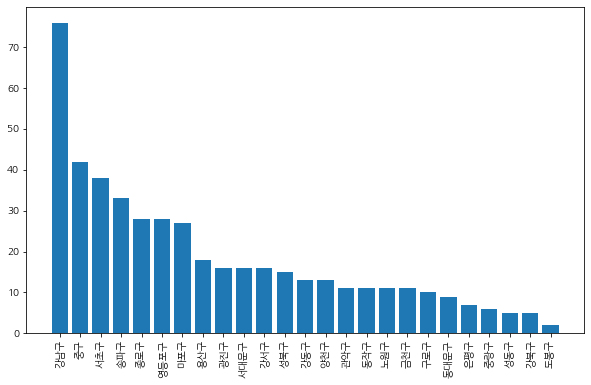

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(soul_coffe['시군구명'].value_counts().index,
       soul_coffe['시군구명'].value_counts().values)
plt.xticks(rotation= 'vertical')
plt.show()
plt.savefig('starbucks_plot.png')

In [ ]:
soul_coffe

,index,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,1355901,20585779,스타벅스,동숭로아트점,음식,커피점/카페,서울특별시,종로구,이화동,127.003887,37.582964
1,1356831,20015708,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,서울특별시,서초구,서초3동,127.014198,37.484386
2,1356929,20666449,스타벅스,현대목동점,음식,커피점/카페,서울특별시,양천구,목1동,126.874682,37.527147
3,1357940,28520216,스타벅스미아사거리역점,미아사거리역점,음식,커피점/카페,서울특별시,강북구,송중동,127.030685,37.611841
4,1357959,22934175,스타벅스,가로수길점,음식,커피점/카페,서울특별시,강남구,신사동,127.021629,37.523184
...,...,...,...,...,...,...,...,...,...,...,...
462,1630520,17531094,스타벅스,NaN,음식,커피점/카페,서울특별시,광진구,중곡1동,127.081329,37.562814
463,1630902,17512841,스타벅스,태릉입구역DT점,음식,커피점/카페,서울특별시,노원구,공릉1동,127.079298,37.619249
464,1631451,17484396,스타벅스,서울역사점,음식,커피점/카페,서울특별시,용산구,남영동,126.971712,37.554828
465,1631997,17521917,스타벅스,도산사거리점,음식,커피점/카페,서울특별시,강남구,논현2동,127.034097,37.519593


In [ ]:
soul_coffe = soul_coffe.drop(soul_coffe.iloc[:,[0]],axis=1)

# 서울시 스타벅스 시각화

In [ ]:

soul_coffe_map = soul_coffe[['지점명', '위도', '경도']]


let= soul_coffe['위도'].mean()
get= soul_coffe['경도'].mean()

center = [let,get]
m = folium.Map(location=center, zoom_start=12)

# 1000 개의 데이터만 그려냅니다.
for i in soul_coffe_map.index:
    folium.Marker(
        location = soul_coffe_map.loc[i, ['위도', '경도']].values.tolist(),
        tooltip = soul_coffe_map.loc[i, '지점명'],
        radius = 1
    ).add_to(m)
m

## class 선언 만들기

In [ ]:
class Travel: #클래스 선언
    INDIVIDUAL = 1  # 클래스 변수 선언
    PACKAGE=0

     #생성되는 객체의 속성(인스턴스)변수를 초기화하는생성자 매소드
    def __init__(self,travelCode, cityName, flight , travelType, maxPeople,reserved):
        self.travelCode= travelCode
        self.cityName= cityName
        self.flight= flight
        self.travelType= travelType
        self.maxPeople = maxPeople
        self.reserved = reserved

    #부모 클래스 object로부터 상속받은 메소드를 재정의(override)
    def __str__ (self):
        info = self.travelCode+'\t'+ self.cityName+'\t'+self.flight+'\t'
        if self.travelType == Travel.INDIVIDUAL :
            info +='개발자유여행'
        else :
            '패키지 여행'
        info +='\t'+str(self.maxPeople)+'명' + '\t'+ str(self.reserved)+'명'

        return info


travel1=Travel('TRV001','뮌헨','독일항공',Travel.INDIVIDUAL,10,0)


In [ ]:
print(travel1)
travel1.__str__


TRV001	뮌헨	독일항공	개발자유여행	10명	0명


<bound method Travel.__str__ of <__main__.Travel object at 0x000001CB65F961F0>>

In [ ]:
class TravelBiz:

    def __init__(self):
        self.travels =list()

    def printAllTravels(self):
        for t in self.travels:
            print(t)
    def printIndividualTravel(self):
        for t in self.travels:
            if t.travelType == Travel.INDIVIDUAL :
                print(t)
    def printPackageTravels(self):
        for t in self.travels:
            if t.travelType == Travel.PACKAGE :
                print(t)
    def reserveTravel(self,travelCode, reserveCount):
        pass

    def printTravelListTitel(self):
        print('-------------------------------------------------------------')
        print('여행코드  도시명  항공명  여행유형  최대예약가능인원  예약   '  )
        print('-------------------------------------------------------------')


biz = TravelBiz()
print(len(biz.travels))

0


In [ ]:
def printMenu():
    print('------<<메뉴>>----------')
    print('1. 전체 여행 상품 조회')
    print('2. 개별 여행 상품 조회')
    print('3. 패키지 여행 상품 조회')
    print('4. 여행 여행 상품 예약')
    print('9. 종료')
    print('------------------------')



In [ ]:

if __name__ == '__main__':
    biz = TravelBiz()
    biz.travels.append(Travel('TRV001', '뭔헨', '독일항공', Travel.INDIVIDUAL, 10,0))
    biz.travels.append(Travel('TRV002', '프랑스', '에어프랑스', Travel.INDIVIDUAL, 20,0))
    biz.travels.append(Travel('TRV003', 'LA', '델타항공', Travel.PACKAGE, 12,0))
    biz.travels.append(Travel('TRV004', '후쿠오카', '대한항공', Travel.INDIVIDUAL, 15,0))
    biz.travels.append(Travel('TRV005', '상해', '남방항공', Travel.PACKAGE, 10,0))

    while True:
        printMenu()
        menu = int(input('##메뉴 입력 >>>'))
        if menu == 1:
            biz.printTravelListTitel()
            biz.printAllTravels()
        elif menu == 2:
            biz.printTravelListTitel()
            biz.printIndividualTravel()
        elif menu == 3:
            biz.printTravelListTitel()
            biz.printPackageTravels()
        elif menu == 4:
            biz.reserveTravel()
        elif menu == 9:
            break


------<<메뉴>>----------
1. 전체 여행 상품 조회
2. 개별 여행 상품 조회
3. 패키지 여행 상품 조회
4. 여행 여행 상품 예약
9. 종료
------------------------
##메뉴 입력 >>>1
-------------------------------------------------------------
여행코드  도시명  항공명  여행유형  최대예약가능인원  예약   
-------------------------------------------------------------
TRV001	뭔헨	독일항공	개발자유여행	10명	0명
TRV002	프랑스	에어프랑스	개발자유여행	20명	0명
TRV003	LA	델타항공		12명	0명
TRV004	후쿠오카	대한항공	개발자유여행	15명	0명
TRV005	상해	남방항공		10명	0명
------<<메뉴>>----------
1. 전체 여행 상품 조회
2. 개별 여행 상품 조회
3. 패키지 여행 상품 조회
4. 여행 여행 상품 예약
9. 종료
------------------------
##메뉴 입력 >>>2
-------------------------------------------------------------
여행코드  도시명  항공명  여행유형  최대예약가능인원  예약   
-------------------------------------------------------------
TRV001	뭔헨	독일항공	개발자유여행	10명	0명
TRV002	프랑스	에어프랑스	개발자유여행	20명	0명
TRV004	후쿠오카	대한항공	개발자유여행	15명	0명
------<<메뉴>>----------
1. 전체 여행 상품 조회
2. 개별 여행 상품 조회
3. 패키지 여행 상품 조회
4. 여행 여행 상품 예약
9. 종료
------------------------


KeyboardInterrupt: Interrupted by user